<a href="https://colab.research.google.com/github/JustinaSarsk/Mano-portfolio/blob/main/top100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *2022 metų Top 100 turtingiausių asmenų duomenų analizė*

❗❗❗
* Projekto veikimui būtina įsikelti excel failą į Google Colab 
  (jį rasite Paspaudę ant Mano_porfolio);
* Žemėlapis ir interaktyvūs grafikai rodomi tik atsidarius Google Colab. 

In [ ]:
#Pasirinkite excel failą,kurį atsisiuntėte iš Mano_profolio ir įkelkite čia
from google.colab import files
a=files.upload()
#Išvalo failo įkėlimo informaciją
from IPython.display import clear_output
clear_output()

In [ ]:
#Instaliuoja trūkstamas bibliotekas
!pip install pytube
!pip install plotly
#Išvalo instaliavimo informaciją
from IPython.display import clear_output
clear_output()

In [ ]:
#Importuoja bibliotekas
import pandas as pd #dokumentacijai
import matplotlib.pyplot as plt #grafikams
import matplotlib as mpl
import numpy as np
import requests 
from tkinter import * 
import tkinter.font as fnt
import folium #zemelapis
from folium.plugins import MarkerCluster
import webbrowser
import matplotlib.patches as mpatches
from pytube import YouTube
import plotly.express as px


In [ ]:
#Pasiima duomenis iš excel
df = pd.read_excel('exelfailas.xlsx',sheet_name="Sheet1")
df_2 = pd.read_excel('exelfailas.xlsx',sheet_name="Sheet2")
df_3 = pd.read_excel('exelfailas.xlsx',sheet_name="Sheet3")
df_4 = pd.read_excel('exelfailas.xlsx',sheet_name="Sheet4")
#Parodo pirmas 3 eilutes (sheet1)
df.head(3)

,Name,Age,Country,Source,Industry,Gender,NetWorth_Billions/100,Countinent,CountryCode
0,Elon Musk,50,United States,"Tesla, SpaceX",Automotive,Male,219.0,North America,USA
1,Jeff Bezos,58,United States,Amazon,Technology,Male,171.0,North America,USA
2,Bernard Arnault,73,France,LVMH,Fashion & Retail,Male,158.0,Europe,FRA


In [ ]:
#Parodo paskutinės 3 eilutės (sheet1)
df.tail(3)

,Name,Age,Country,Source,Industry,Gender,NetWorth_Billions/100,Countinent,CountryCode
98,Sun Piaoyang,63,China,pharmaceuticals,Healthcare,Male,17.1,Asia,CHN
99,Luo Liguo,66,China,chemicals,Manufacturing,Male,17.0,Asia,CHN
100,Peter Woo,75,Hong Kong,real estate,Real Estate,Male,17.0,Asia,HKG


##*Spalvos*

In [ ]:
#Sukuria spalvų paletę
colors=['#440154FF','#482677FF','#39568CFF','#287D8EFF','#20A387FF','#3CBB75FF','#73D055FF','#B8DE29FF','#DCE319FF','#FDE725FF']

## *Grafikai*

In [ ]:
#Pasiimame duomenis
k=list(df['Name'][0:10])
w=list(df['NetWorth_Billions/100'][0:10]) 

In [ ]:
#Funkcija nubraižo grafiką Top 10 asmenų,pagal turto pasiskirstymą
def top10(k,w):
    """Funkcija parodo Top 10 turtingiausių asmenų stulpelinį grafiką;
    duomenys imami iš exel failo
    duomenys - Vardas Ir Turtas($ Bilijonais)
    Pagal duomenis funkcija paiima pirmus 10 duomenų ir nubraižo stulpelinį grafiką
    """
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.bar(k,w,color=colors)     
    ax.set_ylabel('Turtas ($) bilijonais',fontweight='bold',size=12)
    ax.set_xlabel('Asmuo',fontweight='bold',size=12)
    fig.patch.set_facecolor('xkcd:white')
    ax.set_facecolor('xkcd:white') 
    plt.grid(color="grey") 
    ax.set_title('2022 metų TOP 10 turtingiausių asmenų pasaulyje ($,Bilijonais)',fontweight='bold',size=14)
    #Pasuka x ašį norimu kampu   
    plt.xticks(rotation=75,size=12)
    plt.yticks(size=12)
    plt.show()

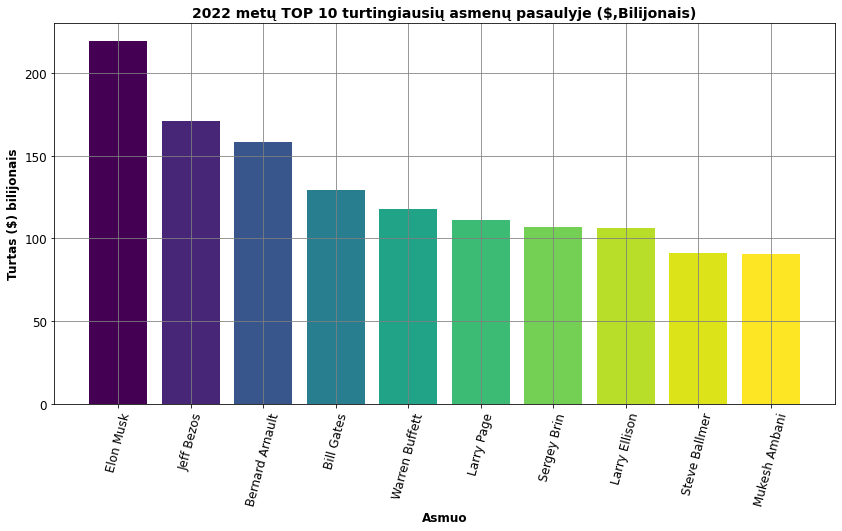

In [ ]:
#Iškviečia funkciją
top10(k,w)

In [ ]:
#Pasiimame duomenis juos sugrupuoja ir suskaičiuoja pagal industrijas
df.groupby(['Industry'])['NetWorth_Billions/100'].count();
df_plot = df.groupby(['Industry'])['NetWorth_Billions/100'].count()

In [ ]:
#Funkcija nubraižo grafiką suskaičiuotų industrijų, parodant populiariausias
def industrijos(df_plot): 
    """ Duomenys iš excel;
    Duomenys grupuojami pagal industrijas
    Funkcija nubraižo stulpelį grafiką;
    x ašis industrija;
    y ašis suskaičiuotų industrijų skaičius.
    """     
    fig, ax = plt.subplots(figsize=(14, 7))    
    ax.bar(df_plot.index,df_plot.values,color=colors,width=1)
    ax.set_xlabel('Industrija',fontweight='bold',size=12)
    fig.patch.set_facecolor('xkcd:white')
    ax.set_facecolor('xkcd:white')
    ax.set_ylabel('Kiekis',fontweight='bold',size=12)
    ax.set_title("""        Vienodų industrijų skaičius/ palyginimui   
        """,fontweight='bold',size=14)
    #Pasuka x ašį norimu kampu
    plt.xticks(rotation=75,size=12)
    plt.yticks(size=12)
    plt.grid(color="grey") 
    plt.show()

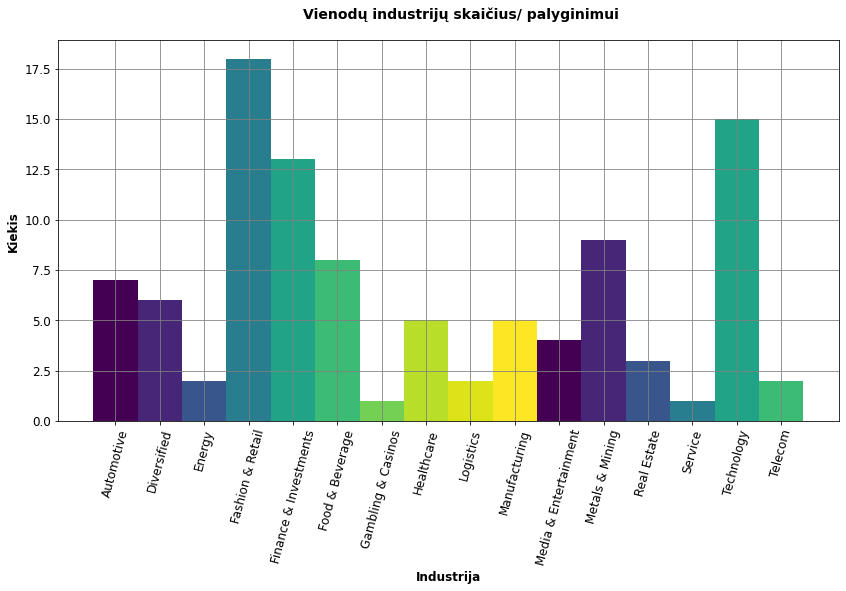

In [ ]:
#Iškviečia funkciją
industrijos(df_plot)


In [ ]:
#Pasiimame duomenis
a1=list(df['Industry'][0:5])
b1=list(df['NetWorth_Billions/100'][0:5])
c1=list(df['Source'][0:5])
d1=list(df['Name'][0:5])
e1=list(df['CountryCode'][0:5])

In [ ]:
#Funkcija nubraižo grafiką suskaičiuotų industrijų,parodant populiariausias
def PiechartTop5(a1,b1,c1,d1,e1):
  
       x =b1
       labels = a1
       labels1=c1
       labels2=d1
       labels3=e1  

       fig, ax = plt.subplots(figsize=(10,5))
       #Sukuria savo persanolizuotą grafiko aprašymo lentelę (legend)
       mano_patch = mpatches.Patch(color=colors[0], label='Elon Musk (Automotive-Tesla,SpaceX)')
       mano_patch1 = mpatches.Patch(color=colors[1], label='Jeff Bezos (Technology-Amazon)')
       mano_patch2 = mpatches.Patch(color=colors[2], label='Bernard Arnault (Fashion&Retail-LVMH) ')
       mano_patch3 = mpatches.Patch(color=colors[3], label='Bill Gates (Technology-Microsoft)')
       mano_patch4 = mpatches.Patch(color=colors[4], label='Warren Buffett (Finance&Invesments-Berkshire Hathaway)')
       ax.pie(x, labels = labels,startangle=25,radius=2.15,labeldistance=1.10,pctdistance=0.9,colors=colors,autopct='%.f%%',
              wedgeprops={'linewidth': 7,  'edgecolor': 'grey'},textprops={'fontweight':'bold','fontsize':12,'color':'#B8DE29FF'})
       ax.pie(x, labels = labels1,radius=1.55,startangle=33,labeldistance=0.69,colors=colors,wedgeprops={'linewidth':4, 'edgecolor': 'grey'},
              textprops={'fontweight':'bold','fontsize':11,'color':'#FDE725FF'})
       ax.pie(x, labels = labels2,startangle=35,labeldistance=2.5,colors=colors,wedgeprops={'linewidth':4, 'edgecolor': 'grey'},
              textprops={'fontweight':'bold','fontsize':14,'color':'#482677FF'})   
       ax.pie(x, labels = labels3,startangle=20,labeldistance=0.40,colors=colors,wedgeprops={'linewidth':2, 'edgecolor': 'grey'},
              textprops={'fontweight':'bold','fontsize':12,'color':'#FDE725FF'})
       #Nubraižo vidurį apskritimą(norimo dydžio ir spalvos)  
       centras_aps = plt.Circle((0, 0), 0.3, fc='white')
       fig.patch.set_facecolor('xkcd:white')
       ax.set_facecolor('xkcd:white')
       fig = plt.gcf()       
       fig.gca().add_artist(centras_aps) 
       plt.title ("""           Top 5 asmenų turto pasiskirstymas % ($,Bilijonais),prekiniai ženklai, industrijos, šalys         
                  
       
       
       
       
       
       
       
                           
              """,fontweight='bold',color='black',size=16)       
       ax.legend(handles=[mano_patch,mano_patch1,mano_patch2,mano_patch3,mano_patch4],bbox_to_anchor=(0, 1.58), loc='upper right',borderaxespad=0,facecolor="white")
              
       plt.show()    

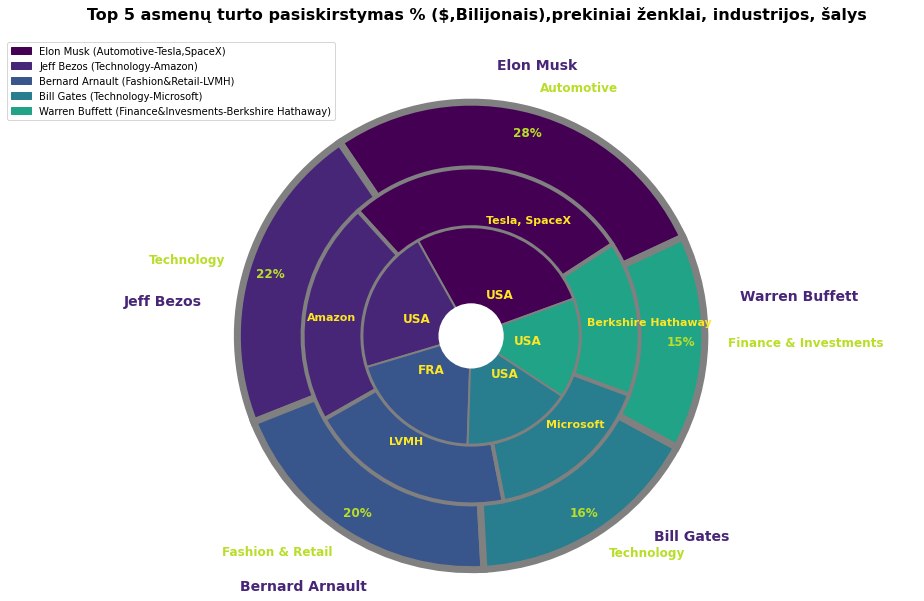

In [ ]:
#Iškviečia funkciją
PiechartTop5(a1,b1,c1,d1,e1)

In [ ]:
#Pasiima duomenis,suskaičiuoja,surušiuoja
df.groupby(['Age'])['Name'].count();
df_plot2 = df.groupby(['Age'])['Name'].count();
df_plot2.index;
df_plot2.values.sort();

In [ ]:
#Funkcija nubraižo grafiką,su suskaičiuotu asmenų amžiumi
def vienodasAmzius(df_plot2):
    fig, ax = plt.subplots(figsize=(14, 7))      
    ax.bar(df_plot2.index,df_plot2.values,color=colors)
    ax.set_xlabel('Amžius',fontweight='bold',color="black",size=12)
    ax.set_ylabel('Asmenų skaičius',fontweight='bold',color="black",size=12)    
    ax.set_title('Vienodo amžiaus palyginimas',fontweight='bold',size=14)
    #Pasuka x ašį norimu kampu
    plt.xticks(rotation=45) 
    #Priskiria grafiko pagrindui spalvas   
    fig.patch.set_facecolor('xkcd:white')
    ax.set_facecolor('xkcd:white') 
    ax.grid(color="grey")
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.show()

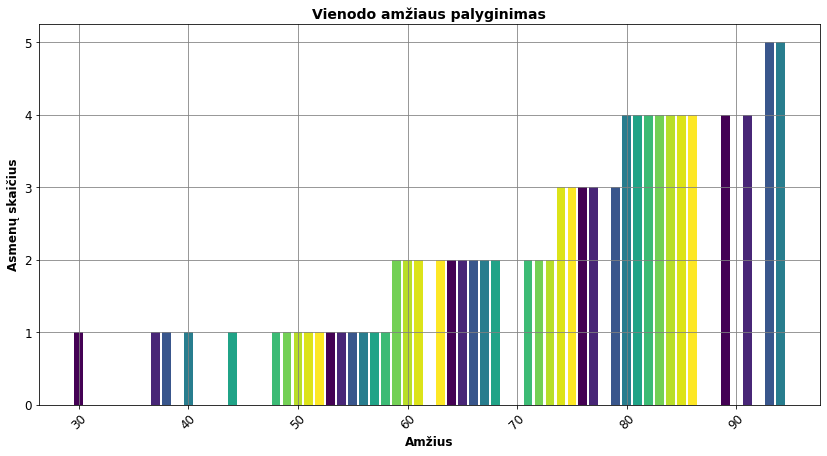

In [ ]:
#Iškviečia funkciją
vienodasAmzius(df_plot2)

In [ ]:
#Pasiima duomenis
x = list(df['Age'])
y = list(df['Country'])

In [ ]:
#Funkcija nubraižo grafiką, parodo asmenų amžių pagal šalis
def amziuspagalSalis(x,y):
    
    plt.figure(figsize=(14, 7),facecolor="white")
    plt.scatter(x,y,marker="o",s=200,edgecolors='#440154FF',c="#20A387FF")
    plt.title("Pasiskirstymas pagal šalis ir amžių",fontweight='bold',size=14)
    plt.grid(color="#440154FF",linestyle=":")
    plt.xlabel("Amžius",fontweight='bold',size=12)
    plt.ylabel("Šalis",fontweight='bold',size=12)
    plt.xticks(size=12)
    plt.yticks(size=12)  
    ax = plt.gca()    
    ax.set_facecolor('xkcd:white')
    plt.show();

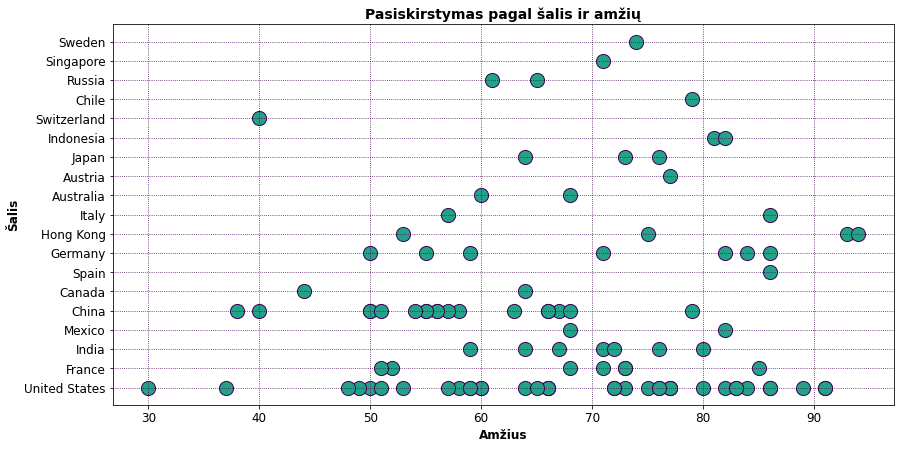

In [ ]:
#Iškviečia funkciją
amziuspagalSalis(x,y)

In [ ]:
#Pasiima duomenis,suskaičiuoja
df_plot3 = df.groupby(['Gender'])['Name'].count()
df.groupby(['Gender'])['Name'].count();
df_plot3.index;
df_plot3.values;

In [ ]:
#Funkcija nubraižo grafiką parodydama vyrų ir moterų pasiskirstymą tarp top100 turtingiausių asmenų
def MoterysVyrai(df_plot3):
    fig, ax = plt.subplots(figsize=(14, 7)) 
    

    ax.bar(df_plot3.index[0], df_plot3.values[0],color='#482677FF',width=0.5,label="Vyrai")
    ax.set_xlabel('Lytis',size=12,color='black')
    ax.set_ylabel('Kiekis',size=12,color='black')
    ax.set_title('pavadinimas')
    ax.legend()
    ax.set_facecolor('grey')
    ax.bar(df_plot3.index[1], df_plot3.values[1],color='#3CBB75FF',width=0.5,label="Moterys")
    ax.set_xlabel('Lytis',size=12,color='black',fontweight='bold')
    ax.set_ylabel('Kiekis',size=12,color='black',fontweight='bold')
    ax.set_title(' 2022 metų TOP 100 turtingiausių asmenų išskirstymas pagal lytį',fontweight='bold',size=14)
    fig.patch.set_facecolor('xkcd:white')
    ax.set_facecolor('xkcd:white')     
    ax.legend(facecolor="white")
    ax.grid(color="grey")
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.show()

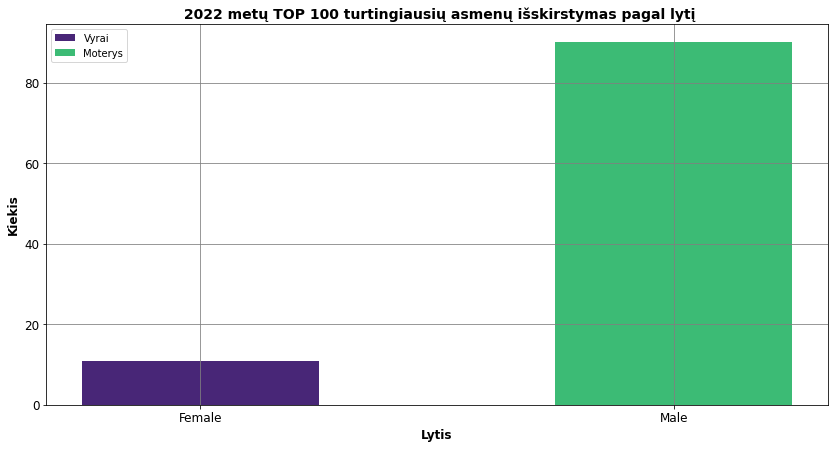

In [ ]:
#Iškviečia funkciją
MoterysVyrai(df_plot3)

In [ ]:
#Pasiima duomenis
w1=list(df_2['Name_w'][0:5])
k1=list(df_2['NetWorth_Billions_w'][0:5])
r1=list(df_2['Industry_w'][0:5])
i1=list(df_2['CountryCode_w'][0:5])

In [ ]:
#Funkcija nubraižo grafiką parodydama top 5 moterų pasiskirstymą pagal turtą,parodo industriją ir šalį
def pieChartMoterys(w1,k1,r1):
       x =(k1)
       labels4 = (w1)
       labels5=(r1)
       labels6=(i1)
       #Grafiko skilčių spalvos
       bar_colors = ['#423f85', '#B8DE29FF', '#B8DE29FF','#B8DE29FF','#B8DE29FF']
       fig, ax = plt.subplots(figsize=(18,8))
       ax.pie(x, labels = labels4,colors=bar_colors,startangle=25,labeldistance=1.05,autopct='%.f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
              textprops={'fontsize':12,'color':'black'})
       ax.pie(x, labels = labels5,colors=bar_colors,startangle=35,labeldistance=1.12,wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
              textprops={'fontsize':12,'color':'#453781FF'})
       ax.pie(x, labels = labels6,colors=bar_colors,startangle=20,labeldistance=0.82,wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
              textprops={'fontsize':12,'color':'black'})
       #Nupiesia apskritimo centra
       centras_aps = plt.Circle((0, 0), 0.75, fc='white')
       fig = plt.gcf()       
       fig.gca().add_artist(centras_aps)
       fig.patch.set_facecolor('xkcd:white')
       ax.set_facecolor('xkcd:white') 
       ax.set_title("""2022 metų Turto pasiskirstymas %,lyginant Top 5 turtingiausias MOTERIS ($,Bilijonais)
              
              """,fontweight='bold',size=14)
            
       plt.show()

In [ ]:
#Pasiima duomenis
z1=list(df['NetWorth_Billions/100'][0:5])
p=list(df['Name'][0:5])

In [ ]:
#Funkcija nubraižo grafiką parodydama top 5 vyrų pasiskirstymą pagal turtą
def pieChartVyrai(z1,p):
       x =(z1)
       labels = (p)
       #Grafiko Skilčių spalvos
       bar_colors = ['#20A387FF', '#B8DE29FF', '#B8DE29FF', '#B8DE29FF','#B8DE29FF']
       fig, ax = plt.subplots(figsize=(18,8))
       ax.pie(x, labels = labels,colors=bar_colors,autopct='%.f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
              textprops={'fontsize':12})
       #Nupiesia apskritimo centra 
       centras_aps = plt.Circle((0, 0), 0.75, fc='white')
       fig = plt.gcf()       
       fig.gca().add_artist(centras_aps)
       fig.patch.set_facecolor('xkcd:white')
       ax.set_facecolor('xkcd:white') 
       ax.set_title(' 2022 metų Turto pasiskirstymas %, lyginant Top 5 turtingiausius VYRUS ($,Bilijonais)',fontweight='bold',size=14)
       plt.show()

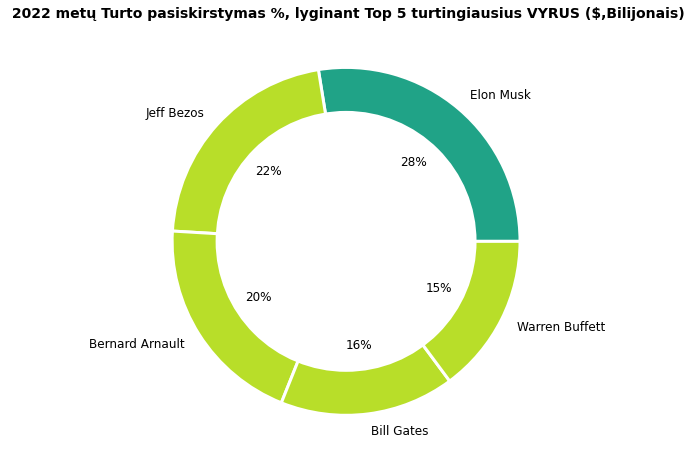

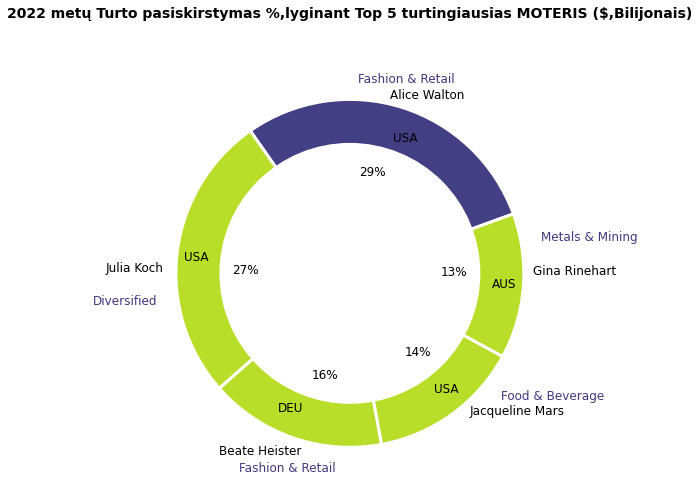

In [ ]:
#Iškviečia funkcijas
pieChartVyrai(z1,p)
pieChartMoterys(w1,k1,r1)

In [ ]:
#Pasiima duomenis
vyrai = df['NetWorth_Billions/100'][0:5]
moterys= df_2['NetWorth_Billions_w'][0:5]
top5 = ['TOP1', 'TOP2', 'TOP3', 'TOP4', 'TOP5']
vyraiamz = df['Age'][0:5]
moterysamz= df_2['Agew'][0:5]
top5 = ['TOP1', 'TOP2', 'TOP3', 'TOP4', 'TOP5']

In [ ]:
#Funkcija nubraižo grafiką parodydama top 5 vyrų ir moterų pasiskirstymą pagal turtą
def vyrmotbendraipalyg (vyrai,moterys,top5):

    width = 0.5
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.bar(top5, vyrai, width, label='Top 5 Vyrų turtas,$ Bilijonais',color="#3CBB75FF")
    ax.bar(top5, moterys, width, bottom=vyrai,label='Top 5 Moterų turtas,$ Bilijonais',color='#482677FF')

    ax.set_ylabel('Turtas $ Bilijonais',fontweight='bold',size=12)
    ax.set_xlabel('Top vieta vyrų ir moterų',fontweight='bold',size=12)
    ax.set_title('Top 5 turtingiausių vyrų ir moterų  turto palyginimas,$ Bilijonais',fontweight='bold',size=14)
    fig.patch.set_facecolor('xkcd:white')
    ax.set_facecolor('xkcd:white') 
    plt.grid(color="#482677FF",linestyle=":")
    ax.legend(facecolor='white')
    plt.xticks(size=12)
    plt.yticks(size=12)

    plt.show()

In [ ]:
#Funkcija nubraižo grafiką parodydama top 5 vyrų ir moterų pasiskirstymą pagal amžių
def vyrmotbendraipalygAMZ(vyraiamz,moterysamz,top5):

    width = 0.3
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.bar(top5, vyraiamz, width, bottom=moterysamz, label='Top 5 Vyrų amžius',color="#3CBB75FF")
    ax.bar(top5, moterysamz, width, label='Top 5 Moterų amžius',color='#482677FF')

    ax.set_ylabel('Amžius',fontweight='bold',size=12)
    ax.set_xlabel('Top vieta vyrų ir moterų',fontweight='bold',size=12)
    ax.set_title('Top 5 turtingiausių vyrų ir moterų  amžiaus palyginimas',fontweight='bold',size=14)
    fig.patch.set_facecolor('xkcd:white')
    ax.set_facecolor('xkcd:white') 
    plt.grid(color="#482677FF",linestyle=":")
    ax.legend(facecolor="white")
    plt.xticks(size=12)
    plt.yticks(size=12)

    plt.show()

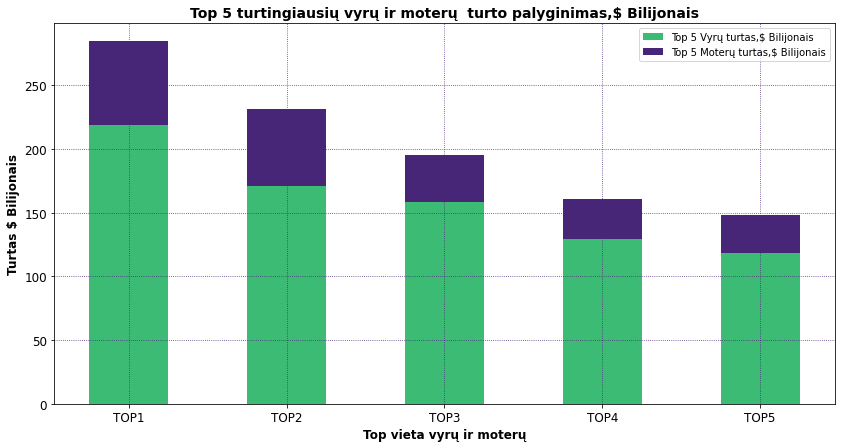

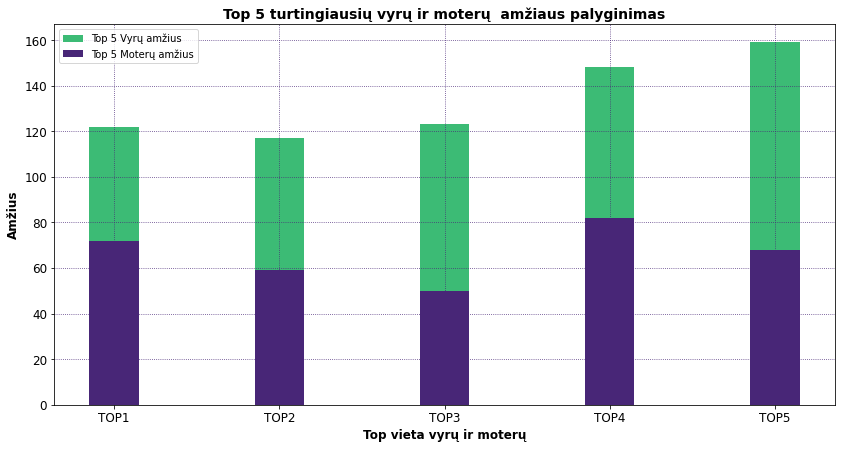

In [ ]:
#Iškviečia funkcijas
vyrmotbendraipalyg (vyrai,moterys,top5)
vyrmotbendraipalygAMZ (vyraiamz,moterysamz,top5)

*2022 metų Top100 turtingiausių asmenų pasiskirstymas pagal kontinentus, šalis ir lytį*

In [ ]:
#Nubraižo interaktyvų grafiką, kuris parodo 2022 metų Top100 turtingiausių žmonių pasiskirstymą
#pagal lytį (suskaičiuoja kiek yra vyrų ir moterų) - kontinentuose ir šalyse
fig=px.sunburst(data_frame=df,path=["Countinent","Country","Gender"],width=1000,height=700,
                #color_discrete_sequence=['purple', 'green', 'yellowgreen', 'yellow'],
                color_discrete_sequence=px.colors.qualitative.Prism,
                title=""" !!!Paspauskite ant kontinento-->išsirinkite šalį-->parodys kiek vyrų ar moterų priklauso pasirinktai šaliai.""")
                
fig.show()

##*Funkcijos,skaičiavimai*

In [ ]:
#Paiima duomenis
ageavg=df["Age"]
#Funkcija suskaičiuoja top100 asmenų amžiaus vidurkį
def Average(ageavg):
    return sum(ageavg) / len(ageavg)


Average(ageavg)
x=round(Average(ageavg),)
#Atspausdina rezultatą
print(f'2022 metais Top 100 turtingiausių asmenų amžiaus vidurkis buvo {x} metai')

2022 metais Top 100 turtingiausių asmenų amžiaus vidurkis buvo 67 metai


In [ ]:
#Pasiima duomenis
age1=df['Age']
name1=df['Name']
#Funkcija pereina per asmenų sąrašą išrenka ir parodo asmenis, kurie atitinka amžiaus vidurkį
def aravg(age1,name1):  
    for i,element in enumerate(age1):
        if element==67:
            y=df['Name'][i]
            print(f'{y} amžius atitinka vidurkį')  

In [ ]:
#Iškviečia funkciją
aravg(age1,name1)

Zhong Shanshan amžius atitinka vidurkį
Radhakishan Damani amžius atitinka vidurkį


In [ ]:
#Pasiima duomenis
vardas=df["Name"][0:5]  
amzius=df['Age'][0:5]
#Funkcija atspausdina top5 vyrų amžių, atspausdina vyriškas ikonėles
def top5amzius(vardas, amzius):
    new_vyru = {vardas[i]:amzius[i] for i in range(len(vardas))}
    print (f'TOP 5  \U0001F57A \U0001F57A \U0001F57A \U0001F57A \U0001F57A - amžius:  {new_vyru}')
  
#Pasiima duomenis    
vardasw=df_2["Name_w"][0:5]  
amziusw=df_2['Agew'][0:5]
#Funkcija atspausdina top5 moterų amžių, atspausdina moteriškas ikonėles
def top5amziuswoman(vardasw, amziusw):
    new_moteru = {vardasw[i]:amziusw[i] for i in range(len(vardasw))} 
    print(f'TOP 5  \U0001F483 \U0001F483 \U0001F483 \U0001F483 \U0001F483 - amžius:  {new_moteru}')


In [ ]:
#Iškviečia funkcijas
top5amzius(vardas, amzius)
top5amziuswoman(vardasw,amziusw)

TOP 5  🕺 🕺 🕺 🕺 🕺 - amžius:  {'Elon Musk': 50, 'Jeff Bezos': 58, 'Bernard Arnault': 73, 'Bill Gates': 66, 'Warren Buffett': 91}
TOP 5  💃 💃 💃 💃 💃 - amžius:  {'Alice Walton': 72, 'Julia Koch ': 59, 'Beate Heister ': 50, 'Jacqueline Mars': 82, 'Gina Rinehart': 68}


In [ ]:
# Mygtukai - kurti ir veikia  su Visual Studio ,parodo kas yra turtingiausias 2022 metais iš vyrų

#el=df['Name'][0]
#root1=Tk()
#def my1():
#   myLabel1=Label(root1,text=el,font = fnt.Font (size = 30))
#   myLabel1.pack()
#myButton1=Button(root1,text='Ar jau įsiminei,kas buvo turtingiausias VYRAS 2022 metais? SPAUSK SUŽINOTI',
#font = fnt.Font (size = 20),padx=70,pady=70,command=my1,fg="black", bg="#49A")
#myButton1.pack()
#root1.mainloop()

In [ ]:
# Mygtukai - kurti ir veikia su  Visual Studio, parodo kas yra turtingiausias 2022 metais iš moterų 
#wm=df_2['Name_w'][0];
#root1=Tk()
#def my1():
#   myLabel1=Label(root1,text=wm,font = fnt.Font (size = 30))
#   myLabel1.pack()
#myButton1=Button(root1,text='Ar jau įsiminei,kas buvo turtingiausia MOTERIS 2022 metais? SPAUSK SUŽINOTI',
#font = fnt.Font (size = 20),padx=70,pady=70,command=my1,fg="black", bg="purple")
#myButton1.pack()
#root1.mainloop()

In [ ]:
#Pasiima duomenis
t=df['Name'][0]
t1=df['Name'][1]
t2=df['Name'][2]
t3=df['Name'][3]
t4=df['Name'][4]

In [ ]:
#Funkcija paprašo įvesti varda pavarde ir parodo ar žmogus priklauso top5 turtingiausių asmenų,rezultatą atspausdina
def top5sneku(t,t1,t2,t3,t4):
    klausimas=input("Įrašykite vardą ir pavardę ,sužinoti ar jis priklauso Top 5 turtingiausių:").title()
    if klausimas==t:        
        print("""Taip šis asmuo priklausė Top5 turtingiausiem asmenim 2022 metais """)        
    elif klausimas==t1:
        print("""Taip šis asmuo priklausė Top5 turtingiausiem asmenim 2022 metais """)              
    elif klausimas==t2:
        print("""Taip šis asmuo priklausė Top5 turtingiausiem asmenim 2022 metais""")
    elif klausimas==t3:
        print("""Taip šis asmuo priklausė Top5 turtingiausiem asmenim 2022 metais""")
    elif klausimas==t4:
        print("""Taip šis asmuo priklausė Top5 turtingiausiem asmenim 2022 metais""")
    else:
        print("""NE šis asmuo NEpriklausė Top5 turtingiausiem asmenim 2022 metais""")

In [ ]:
#Iškviečia funkciją
top5sneku(t,t1,t2,t3,t4)

Įrašykite vardą ir pavardę ,sužinoti ar jis priklauso Top 5 turtingiausių:Elon Musk
Taip šis asmuo priklausė Top5 turtingiausiem asmenim 2022 metais 


In [ ]:
#Pasiima duomenis
l=df['NetWorth_Billions/100'][0]
l1=df['NetWorth_Billions/100'][1]
l2=df['NetWorth_Billions/100'][2]
l3=df['NetWorth_Billions/100'][3]
l4=df['NetWorth_Billions/100'][4]

In [ ]:
#Funkcija paprašo įvesti varda pavarde iš top5 asmenų, parodo kiek tas asmuo turi mažiau turto už Eloną Musk procentais
def top5palyginimas(l,l1,l2,l3,l4,t,t1,t2,t3,t4):
    klausimas=input("Įrašykite vardą ir pavardę iš Top į asmenų,sužinoti kiek procentų mažiau turto turi už Elon Musk:").title()
    if klausimas==t1:
        print(round(l1*100/l-100),"% mažiau \U0001F4B2 \U0001F4B2 \U0001F4B2")        
    elif klausimas==t2:
        print(round(l2*100/l-100),"% mažiau \U0001F4B2 \U0001F4B2 \U0001F4B2")
    elif klausimas==t3:
        print(round(l3*100/l-100),"% mažiau \U0001F4B2 \U0001F4B2 \U0001F4B2")
    elif klausimas==t4:
        print(round(l4*100/l-100),"% mažiau \U0001F4B2 \U0001F4B2 \U0001F4B2")
    else:
        print("Nelyginame")

In [ ]:
#Iškviečia funkciją
top5palyginimas(l,l1,l2,l3,l4,t,t1,t2,t3,t4)

Įrašykite vardą ir pavardę iš Top į asmenų,sužinoti kiek procentų mažiau turto turi už Elon Musk:Jeff Bezos
-22 % mažiau 💲 💲 💲


##*Daugiau apie Elon Musk*

In [ ]:
#Pasiima duomenis
x4 = df_4['Data']
y4 = df_4['Turtas($,Bilijonais)']
#Funkcija palygina Elon Musk turtą nuo 2020 metų iki 2022 12 29 (duomenys imti iš Forbes)
def elonmusk(y4,x4):  
    fig, ax = plt.subplots(figsize=(14,7))        
    plt.plot(y4, x4, color='#453781FF',marker="D",linewidth=2.5)
    plt.xlabel("Turtas ($) Bilijonais",fontweight="bold",size=12)  
    plt.ylabel("Data",fontweight="bold",size=12)  
    plt.title("Elon Musk turto kitimas nuo 2020 metų iki 2023 metų",fontweight="bold",size=14)  
    plt.grid(color="yellowgreen",linestyle=":")
    plt.xticks(rotation=45)    
    fig.patch.set_facecolor('xkcd:white')
    ax.set_facecolor('xkcd:white')
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.show()

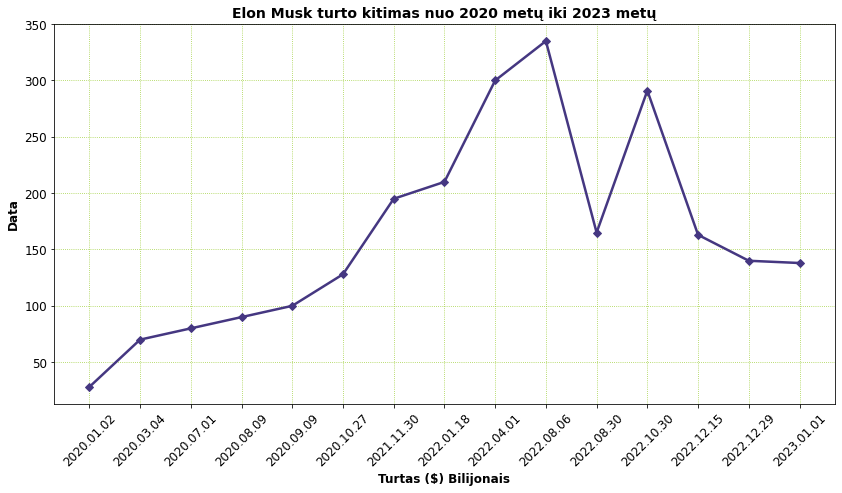

In [ ]:
#Iškviečia funkciją
elonmusk(x4,y4) 

In [ ]:
#Tas pats grafikas su plotly
#Palygina Elon Musk turtą nuo 2020 metų iki 2022 12 29 (duomenys imti iš Forbes)
fig1 = px.line(df_4, y="Turtas($,Bilijonais)",x="Data",text="Metai",
               color_discrete_sequence=['purple'],
               title="Elon Musk turto kitimas nuo 2020 metų iki 2023 metų")
fig1.update_layout(plot_bgcolor="white")
fig1.update_traces(textposition=["top left", "top left", "top left", "top left","top left", 
                                 "top left","top left","top left","top left","top left",
                                 "bottom center","top center","top right","top right","top right"])
fig1.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='yellowgreen')
fig1.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='yellowgreen')
fig1.show()

In [ ]:
#Funkcija į puslapį
def moreabuotelon():
    url="https://en.wikipedia.org/wiki/Elon_Musk"
    webbrowser.open(url);

In [ ]:
#Iškviečia funkciją
moreabuotelon()

##*Atsiunčia dokumentiką apie Elon Musk*

In [ ]:
#Funkcija atsiunčia iš Youtube dokumentiką apie Elon Musk
def atsiunciu(link):
    manoYoutube=YouTube(link)
    manoYoutube=manoYoutube.streams.get_highest_resolution()
    try:
         manoYoutube.download()
    except:
        print("Nepavyko atsiusti failo")
    print('DOKUMENTIKA APIE ELON MUSK ATSIŲSTA')
    
link='https://www.youtube.com/watch?v=i7nZBJVI26A'
atsiunciu(link)

DOKUMENTIKA APIE ELON MUSK ATSIŲSTA


##*Žemėlapis*

In [ ]:
#Pasiima duomenis,susumuoja turtą pagal šlies kodą
map_data=df.groupby(['CountryCode'])['NetWorth_Billions/100'].sum()
#Žemėlapio pagrindas 
geojson_url='https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json'
response= requests.get(geojson_url)
geojson=response.json()

In [ ]:
#Sukuriame žemėlapio scalė pagal susumuotus duomenis
scale=np.linspace(map_data.min(),
                    map_data.max(),
                    9,dtype=int)
scale=scale.tolist()
scale[-1]=scale[-1]+1 

In [ ]:
#Funkcija parodo žemėlapį pagal susumuotą turtą,nuspalvina pagal jį šalis
def zemelapis(map_data,scale):
    m=folium.Map(location=(30,50),zoom_start=2)       
    folium.Choropleth (
    geo_data=geojson,
    data=map_data,
    columns=["CountryCode","NetWorth_Billions/100"],
    key_on='feature.id',
    fill_color="viridis",
    #Spalvų užpildymo stiprumas
    fill_opacity=0.7,
    line_opacity=0.5,
    visible=False,
    threshold_scale=scale,
    legend_name="Bendras turtas pagal šalis ($) bilijonais)",
    smooth_factor=0,
    #Šalis kurių nėra sąraše nuspalvina baltai
    nan_fill_color='white',
    line_color='white',    
    line_weight=2    
    ).add_to(m) 
    #Žemėlapio fonas/stilius   
    folium.TileLayer('cartodbpositron').add_to(m)
    return(m)

In [ ]:
#Iškviečia funkciją
zemelapis(map_data,scale)

##*Analizės klausimai*
* Kas buvo turtingiausias 2022 metais iš vyrų ir moterų;
* Kokios populiariausios industrijos;
* Kokią dalį tarp top 100 sudaro moterys , kokia vyrai;
* Moterų ir vyrų turto palyginimai;
* Top100  asmenų amžiaus vidurkio išsiaiškinimas;
* Turtiniaugia šalis pagal bendrą turtą.

##*Išvados*
Turtingiausias  vyras 2022 metais buvo Elon Musk (nors pagal naujausius duomenis jo turtas  šiuo metu nukritęs )
Turtingiausia moteris 2022 metais Alice Walton;
Populiariausios industrijos - mados ir technologijų;
Iš Top 100 moterų yra žymiai mažiau nei vyrų (moterų 11, vyrų 89);
Tarp top 5 vyrų turtas gerokai didesnis nei moterų, tuo tarpu amžiaus skirtumo tokio didelio nėra;
Top 100 asmenų amžiaus vidurkis yra 67 metai, pagal vidurkį atitinkančių asmenų yra du; jauniasias yra 30 metų; vyriausi virš 90 metų;
Turtiniaugia šalis pagal bendrą turtą yra Šiaurės Amerika.